**Diagnostic Classification of Breast Tumors: A Data Mining Approach Using Principal Component Analysis For Dimensionality Reduction**

The Breast Cancer Wisconsin (Diagnostic) dataset is a well-known dataset in the field of machine learning, particularly for classification tasks related to the diagnosis of breast cancer. Here are some key details about the dataset:

Dataset Information:
Source: UCI Machine Learning Repository
Donation Date: 10/31/1995
Subject Area: Health and Medicine
Associated Tasks: Classification
Feature Type: Real
Number of Instances: 569
Number of Features: 30
Features:
ID: Categorical (identification number)
Diagnosis: Target variable (Malignant - M, Benign - B)
3-32. Features 1-30:
Various real-valued features computed from digitized images of fine needle aspirates (FNA) of breast masses.
These features describe characteristics of cell nuclei present in the images.
Additional Information:
Missing Values: No
Feature Details:
The features include measures related to radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.
Features are computed for each cell nucleus, and there are ten real-valued features for each nucleus.
Variable Information:
ID Number: Categorical
Diagnosis: Target variable (Malignant or Benign)
3-32. Features 1-30:
Various continuous features representing different characteristics of cell nuclei.


Install UC Irvine Machine Learning Repository Package

In [5]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


Import necessary packages

In [6]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


Import Datset from UC Irvine Machine Learning Repository

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

Read Predictor variables

In [9]:
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Read target Variable

In [10]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


Merge features (X) and target class (y)

In [11]:

# Merge features (X) and target class (y)
df = pd.concat([X, y], axis=1)

# Display the merged DataFrame
print(df.head())



   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

Check for Missing Values

In [12]:
print(df.isnull().sum())


radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64


Check Descriptive Statistics for Each Variable

In [13]:
print(df.describe())


          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         

Check Target Class Distribution

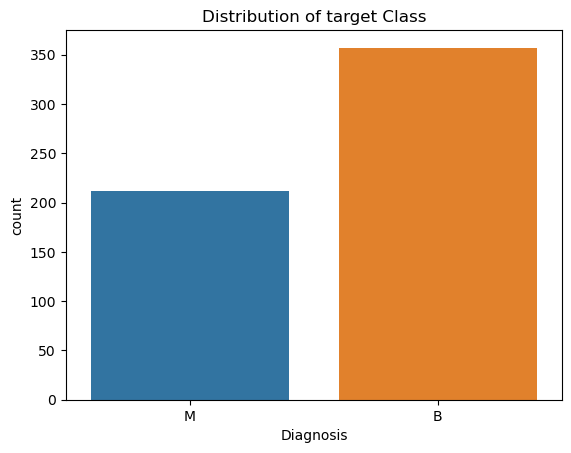

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of target Class')
plt.show()


In [15]:
class_counts = df['Diagnosis'].value_counts()

print("Class Counts:")
print(class_counts)


Class Counts:
B    357
M    212
Name: Diagnosis, dtype: int64


Dataset is highly imbalanced. SMOTE TO BE APPLIED



VISUALIZE VARIABLE DISTRIBUTION USING BOX PLOT

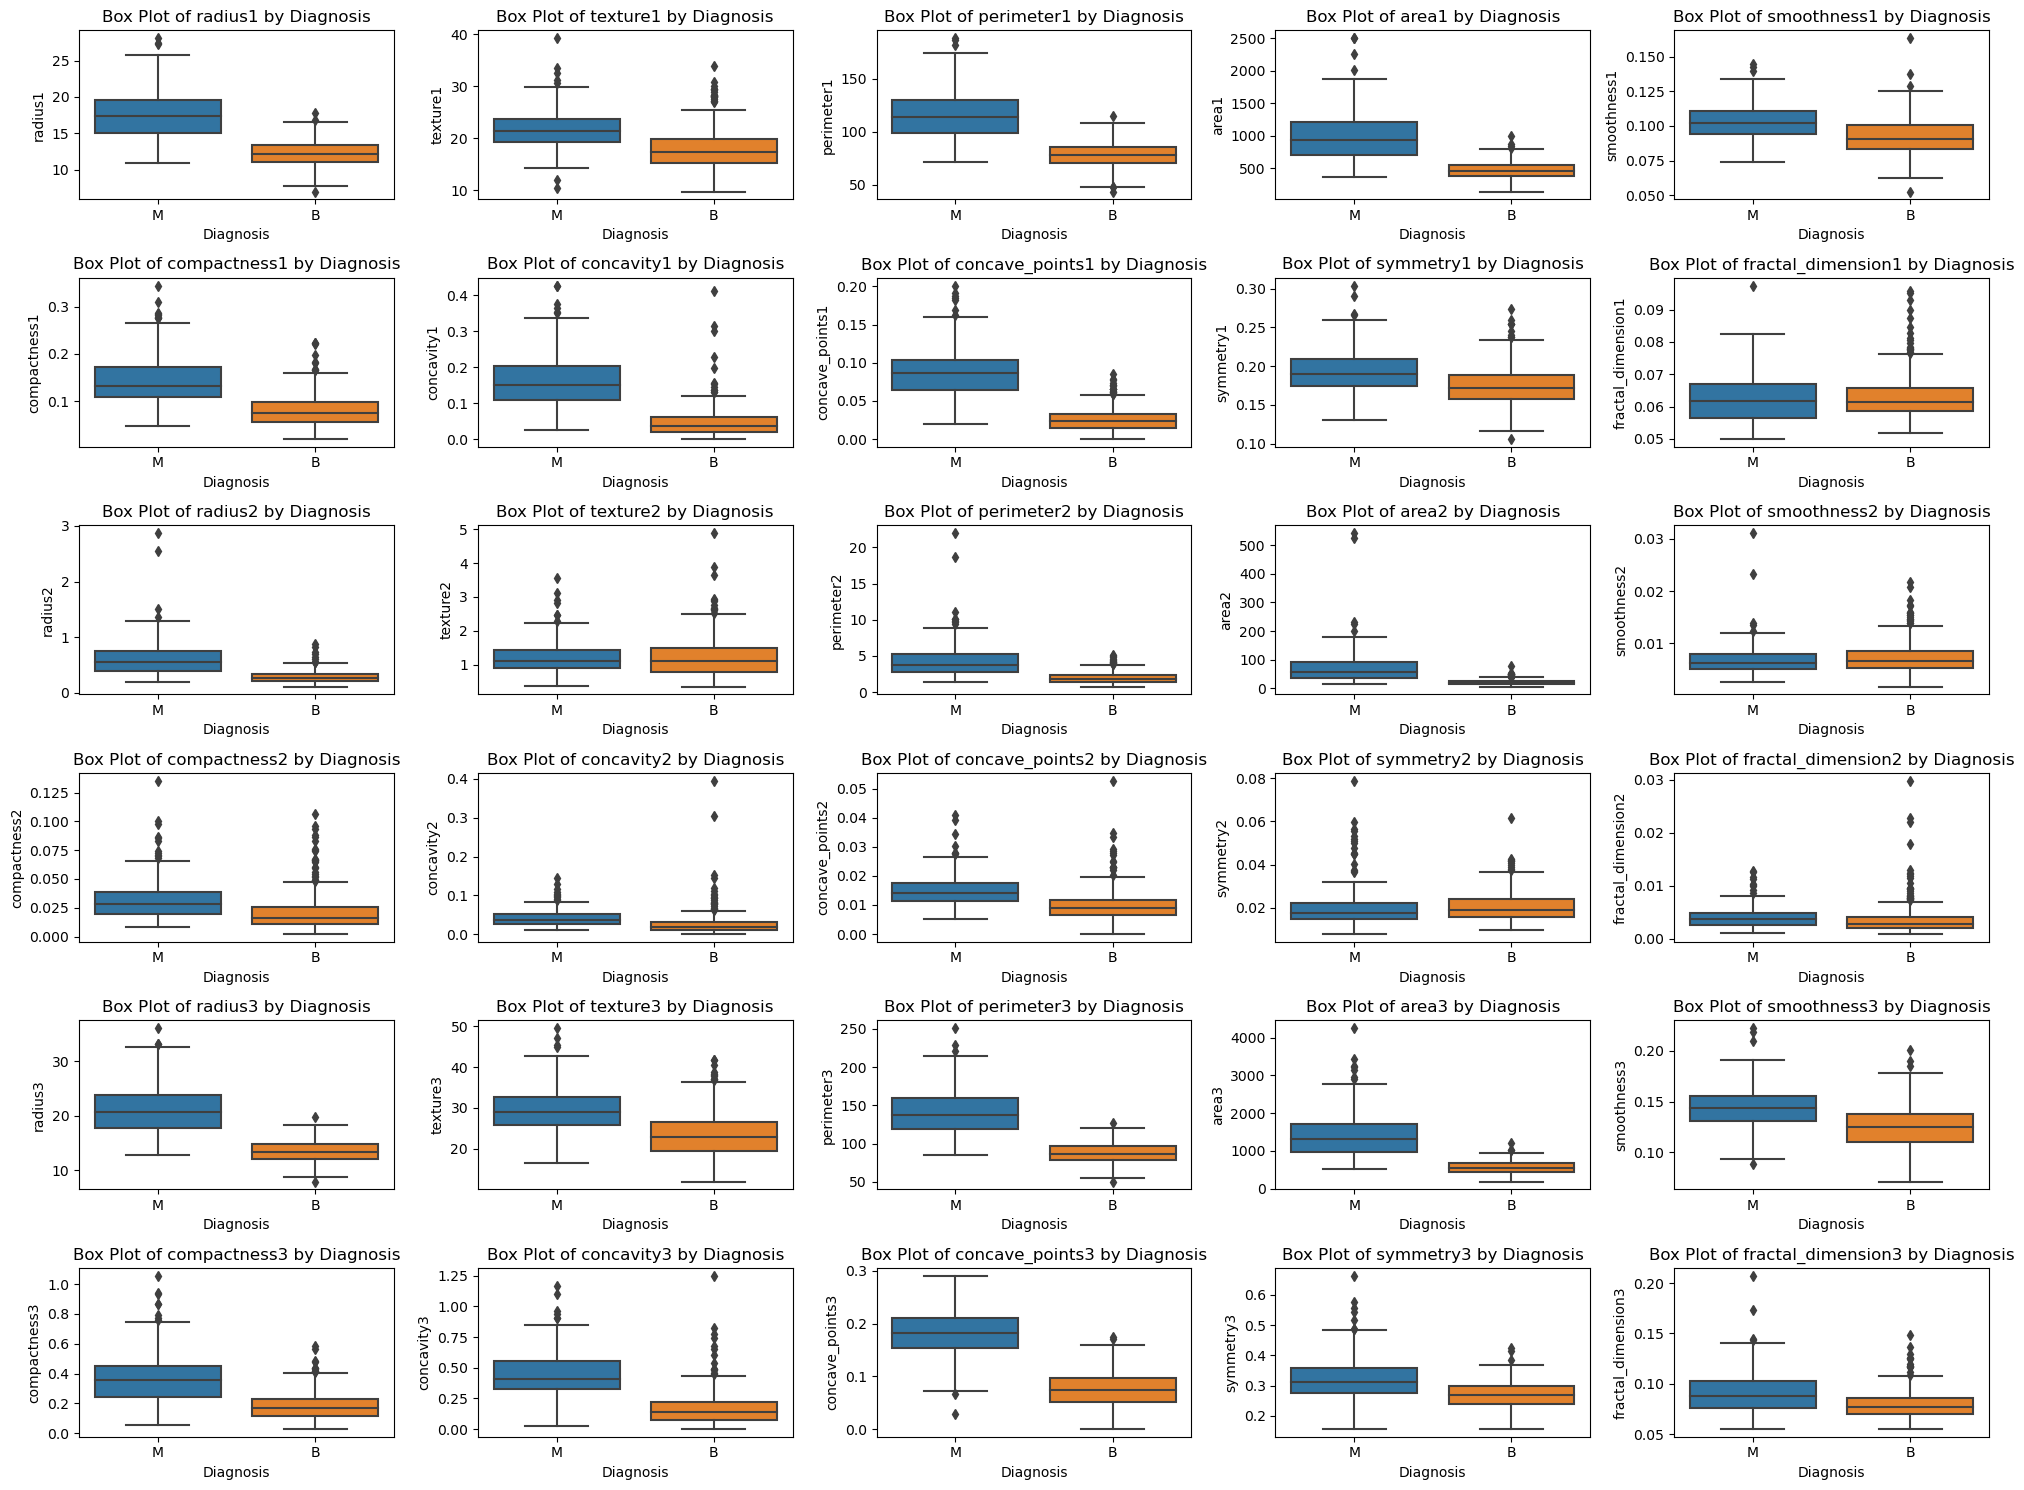

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named df
plt.figure(figsize=(20, 15))

# Assuming the last column is "Diagnosis"
features = df.columns[:-1]
num_features = len(features)

# Dynamically adjust subplot layout
rows = (num_features // 5) + (num_features % 5 > 0)
cols = min(num_features, 5)

# Iterate through features and create box plots
for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='Diagnosis', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Diagnosis')

plt.tight_layout()
plt.show()


CORRELATION HEAT MAP

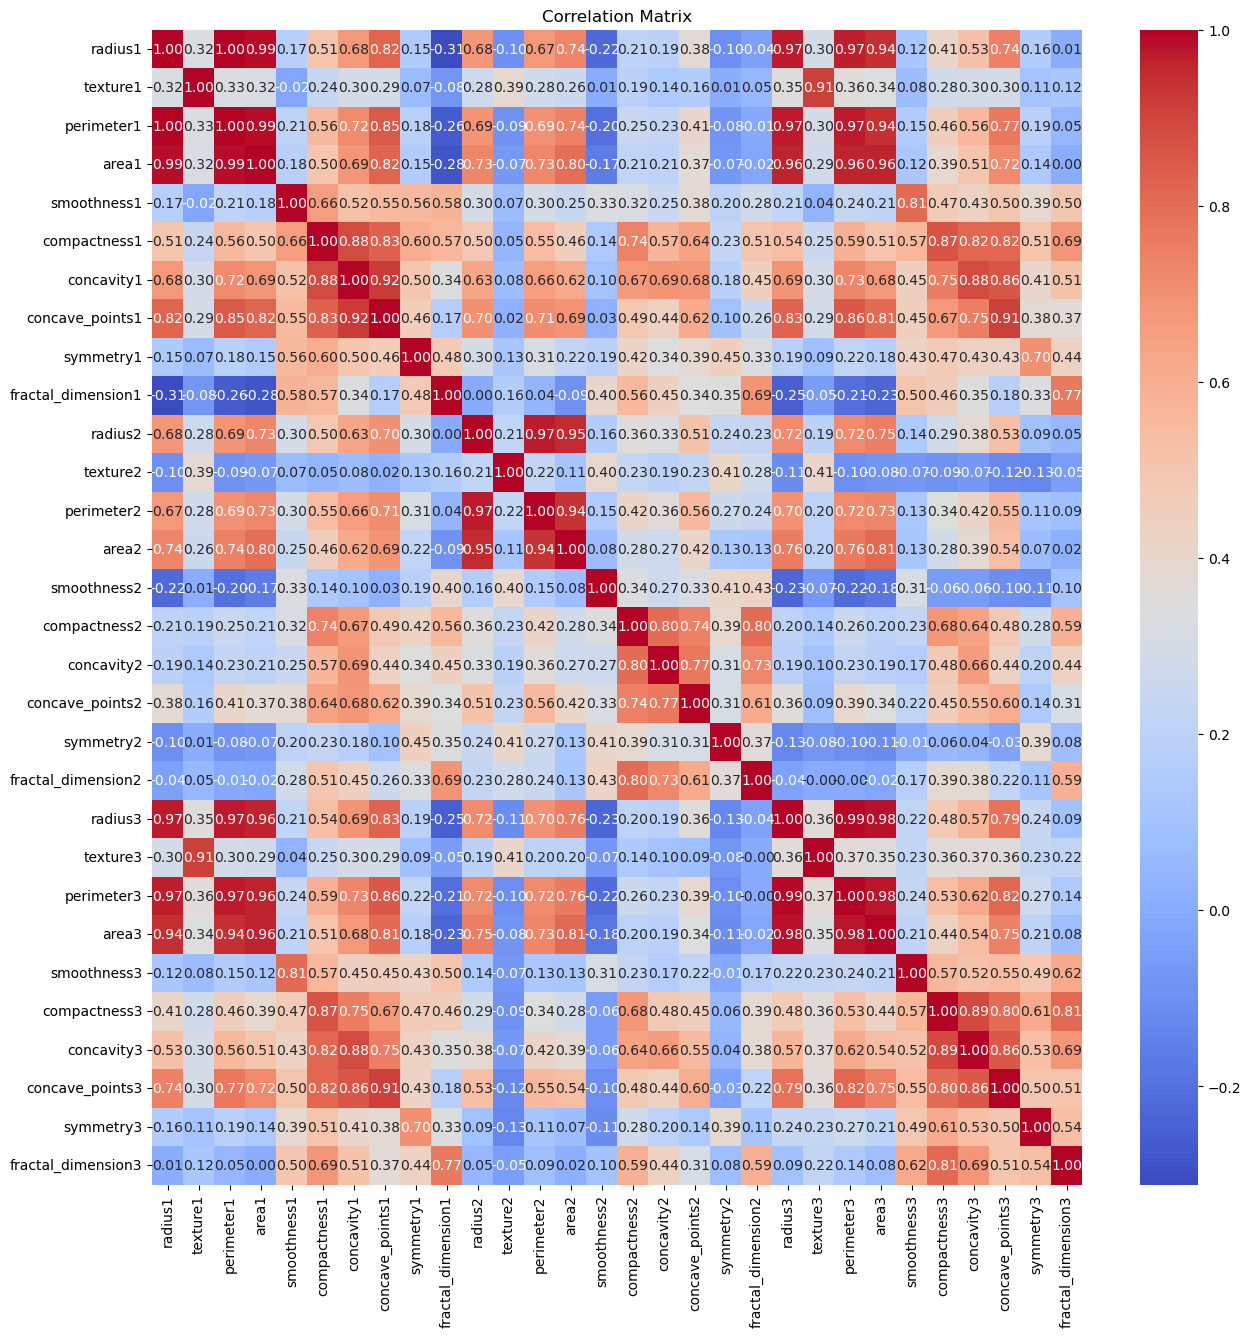

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up a larger plot
plt.figure(figsize=(15, 15))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Multicolinearity can be observed using the correlation heatmap. Perimeter3 has strong positive correlation with perimeter1, area1 and area3.

Normality Check with Smoothed Density Plot

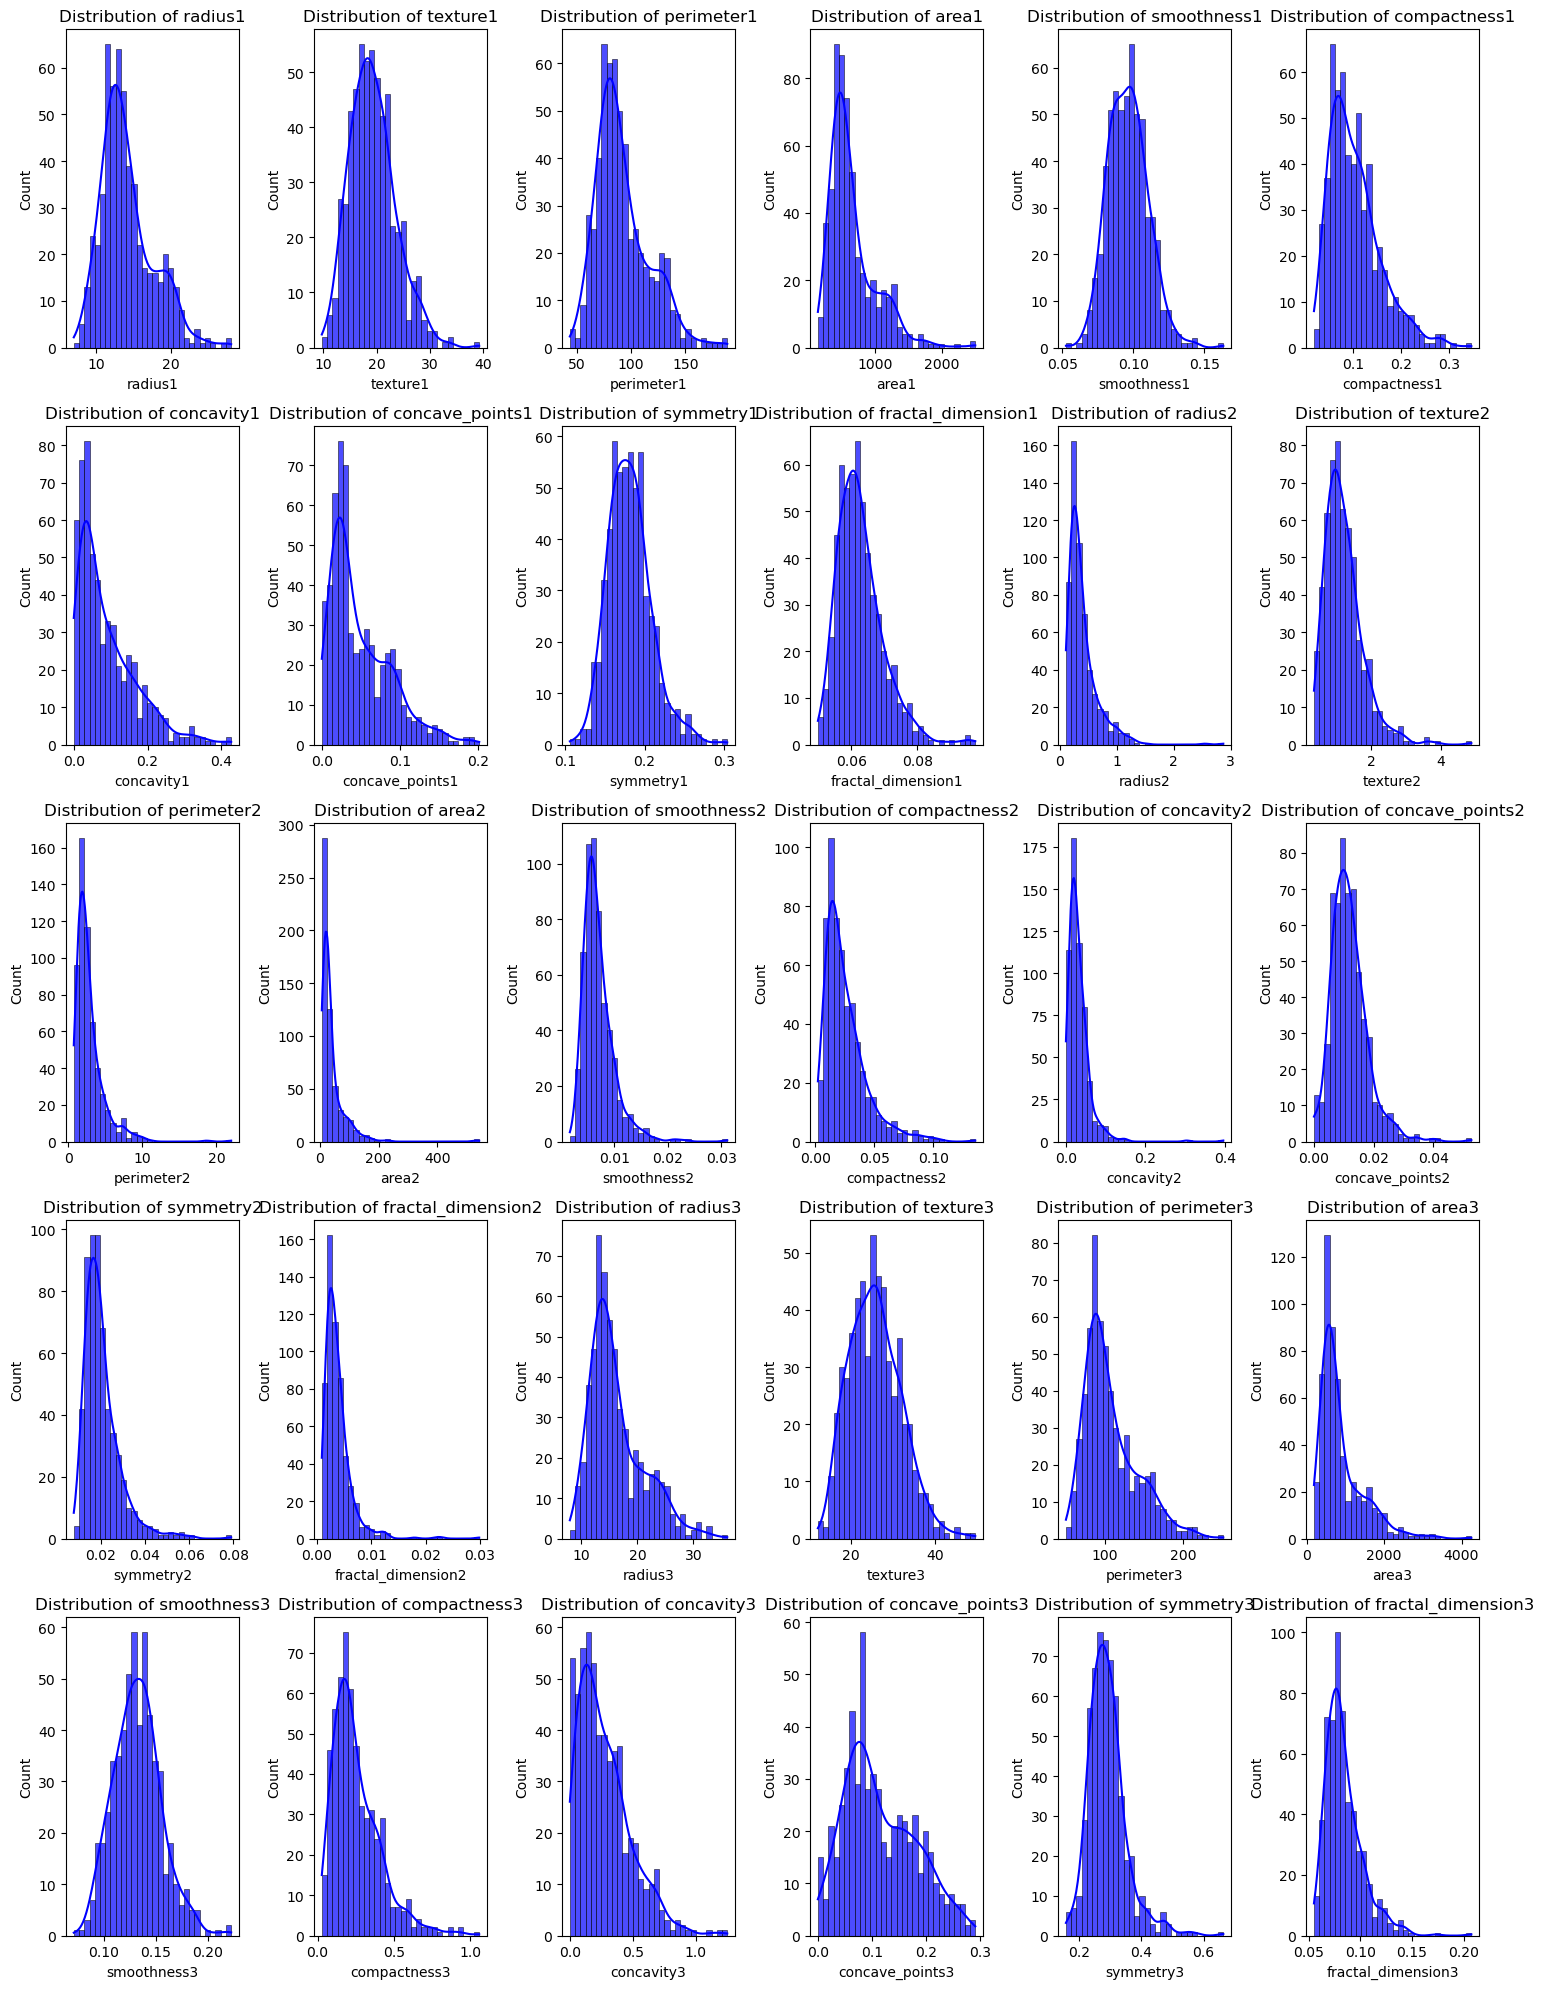

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named df
features = df.columns[:-1]  # Assuming the first two columns are ID and Diagnosis

plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 6, i)
    sns.histplot(df[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


Distribution of texture1, symmetry1, perimeter1, texture3 and smoothness3 appear to be normal ditribution. Other variables are somewhat right skewed.
Hence the need for normalization.

We perform Normalization Using MINMAX SCALER
Performing normalization on the original features ensures that all features have the same scale. Hence this is done before splitting into Test and train data

In [19]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

features = df.columns[:-1]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the feature columns
df_normalized = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_normalized[features] = scaler.fit_transform(df[features])

# Display the DataFrame with normalized features
print(df_normalized.head())


    radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0  0.521037  0.022658    0.545989  0.363733     0.593753      0.792037   
1  0.643144  0.272574    0.615783  0.501591     0.289880      0.181768   
2  0.601496  0.390260    0.595743  0.449417     0.514309      0.431017   
3  0.210090  0.360839    0.233501  0.102906     0.811321      0.811361   
4  0.629893  0.156578    0.630986  0.489290     0.430351      0.347893   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0    0.703140         0.731113   0.686364            0.605518  ...  0.141525   
1    0.203608         0.348757   0.379798            0.141323  ...  0.303571   
2    0.462512         0.635686   0.509596            0.211247  ...  0.360075   
3    0.565604         0.522863   0.776263            1.000000  ...  0.385928   
4    0.463918         0.518390   0.378283            0.186816  ...  0.123934   

   perimeter3     area3  smoothness3  compactness3  concavity3  \
0    0.6

Visualize normalized distribution

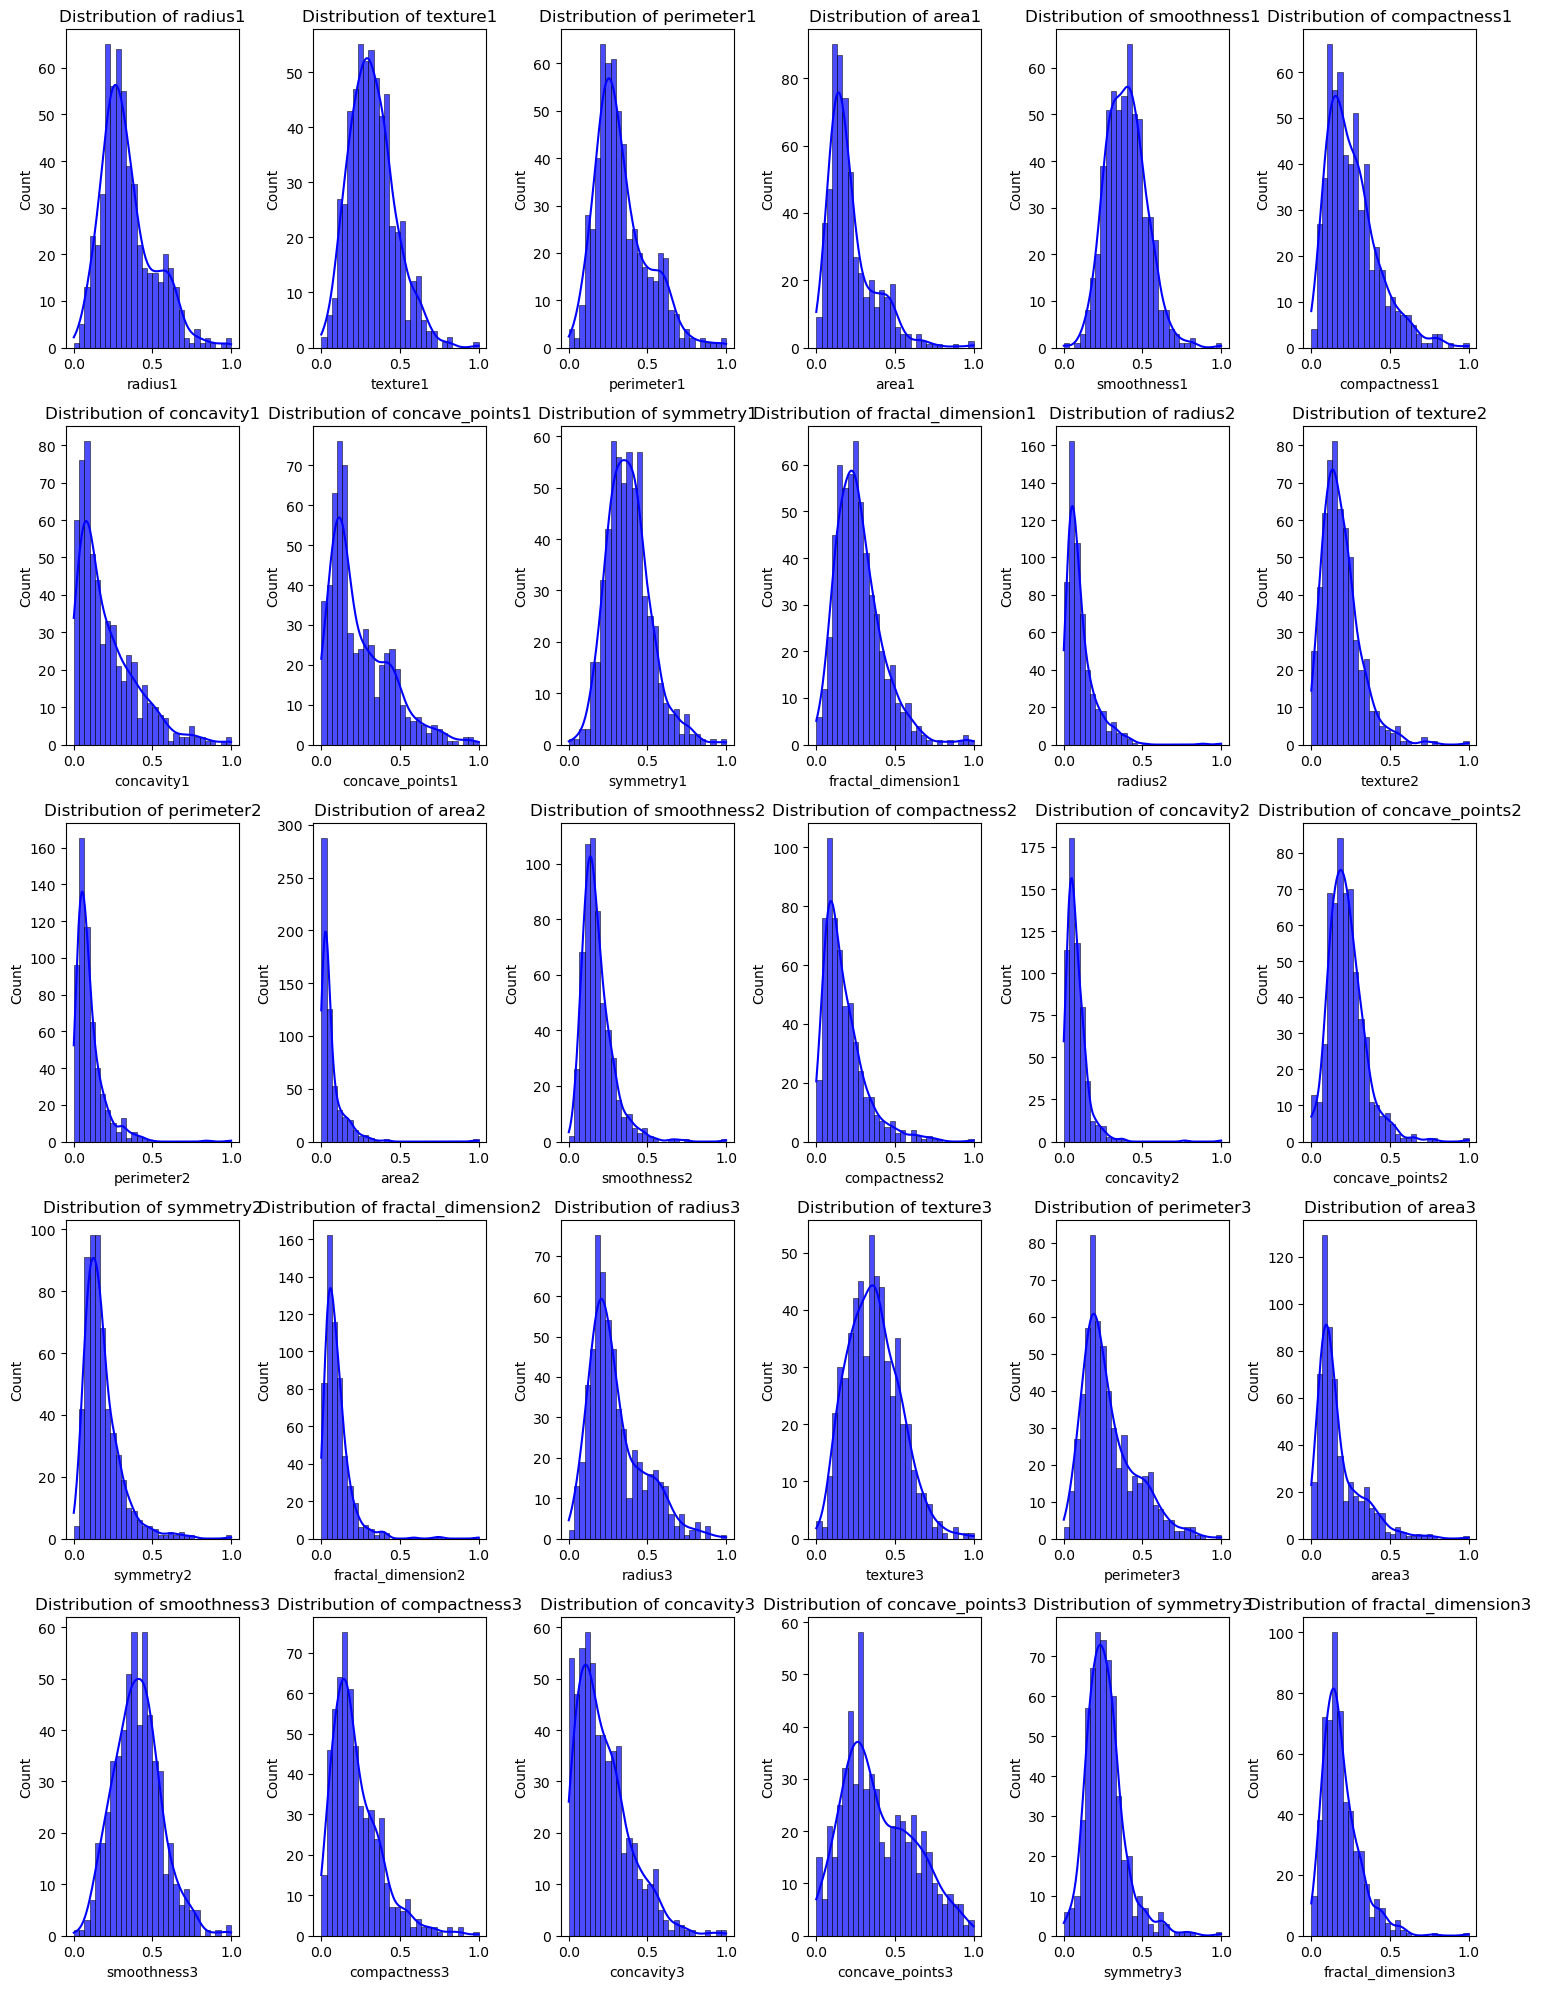

In [20]:
features = df_normalized.columns[:-1]  # Assuming the first two columns are ID and Diagnosis

plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 6, i)
    sns.histplot(df_normalized[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [21]:
df_normalized

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,M
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,M
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,M
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,M


In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

TEST TRAIN SPLIT

In [23]:
# Step 2: Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(df_normalized, y, test_size=0.2, random_state=42)

APPLYING SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable for training set
X_train = X_train.drop('Diagnosis', axis=1)  # Drop the target column for X_train
X_test = X_test.drop('Diagnosis', axis=1)
y_train = y_train

# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape before SMOTE:", X_train.shape, y_train.shape)
print("Shape after SMOTE:", X_train_resampled.shape, y_train_resampled.shape)


Shape before SMOTE: (455, 30) (455, 1)
Shape after SMOTE: (572, 30) (572, 1)


CHECK TARGET CLASS AFTER SMOTE

In [25]:
class_counts = y_train_resampled['Diagnosis'].value_counts()
print("Class Counts:")
print(class_counts)



Class Counts:
B    286
M    286
Name: Diagnosis, dtype: int64


**DIMENSIONALITY REDUCTION USING PCA**

SCREE PLOT

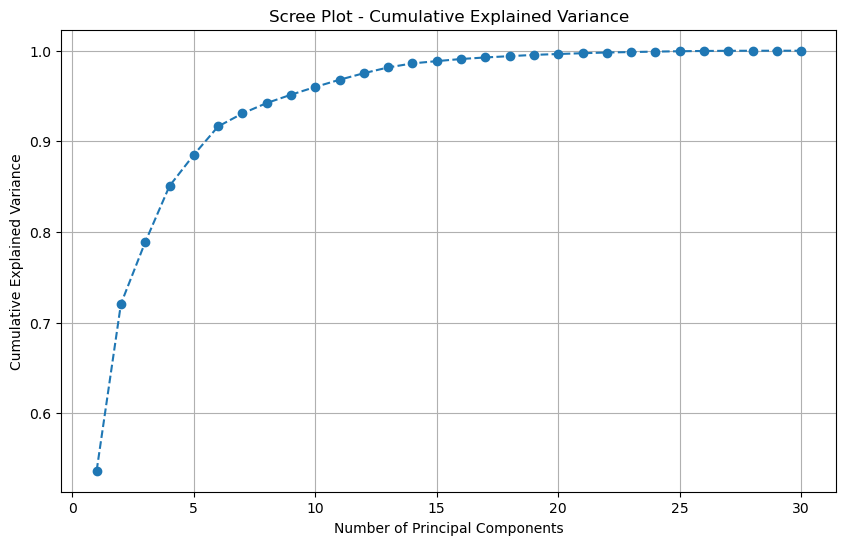

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA()

# Fit PCA on the resampled training data
pca.fit(X_train_resampled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


PERFORM PCA CREATE 7 PRINCIPAL COMPONENTS

In [27]:
from sklearn.decomposition import PCA

# Perform PCA on the training data
n_components = 7  # specify the number of components
pca = PCA(n_components=n_components)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_resampled)

# Transform the test data using the same PCA object
X_test_pca = pca.transform(X_test)

# Check the shape of the transformed data
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)


Shape of X_train_pca: (572, 7)
Shape of X_test_pca: (114, 7)


PRINCIPAL COMPONENTS TRAIN DATAFRAME

In [28]:
# Create a DataFrame with the reduced-dimensional data
df_pca_train = pd.DataFrame(data=X_train_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_pca_train['Diagnosis'] = y_train_resampled
df_pca_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Diagnosis
0,0.303611,1.182417,0.328069,-0.023804,0.532248,0.024696,-0.343969,B
1,1.404680,0.244084,-0.232465,0.055281,0.105685,0.104212,0.175442,M
2,-0.613352,0.383238,0.449698,-0.006297,0.021772,0.340270,0.008961,B
3,-0.535643,0.135900,-0.169149,0.361015,-0.215078,0.060029,0.010905,B
4,-0.642867,0.348976,0.246871,-0.149387,-0.371971,0.435868,0.108589,B
...,...,...,...,...,...,...,...,...
567,0.423113,-0.514138,-0.042355,-0.050216,-0.009126,-0.077695,-0.014114,M
568,0.106453,0.169836,-0.166976,0.112403,0.094189,0.034139,-0.038018,M
569,0.580007,-0.143596,-0.235811,0.268073,0.089001,-0.064657,-0.052118,M
570,0.402782,-0.203042,-0.032196,-0.099277,-0.134497,-0.033661,-0.023001,M


PRINCIPAL COMPONENTS TEST DATAFRAME

In [29]:
# Create a DataFrame with the reduced-dimensional data
df_pca_test = pd.DataFrame(data=X_test_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_pca_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.240121,0.132186,-0.065897,-0.036097,-0.061766,0.002371,0.015617
1,0.382700,-0.564187,-0.017845,-0.042969,0.024800,-0.053042,0.042684
2,0.191485,-0.066886,-0.148548,-0.097823,-0.115871,-0.063287,-0.089591
3,-0.309946,0.312913,0.092857,-0.044261,-0.051658,-0.129351,0.050827
4,-0.443041,0.271938,0.232794,-0.114342,-0.028713,-0.150258,-0.039396
...,...,...,...,...,...,...,...
109,-0.383101,-0.319090,-0.113097,-0.039817,0.133405,-0.055581,-0.016806
110,0.116835,-0.250787,0.051773,-0.052014,-0.112286,-0.088716,-0.136580
111,-0.482840,0.093150,-0.058537,-0.158708,-0.089329,-0.014169,-0.068667
112,-0.185001,-0.145720,0.026470,0.555959,0.142756,-0.270163,0.019557


Explained Variance of Each PRINCIPAL COMPONENT

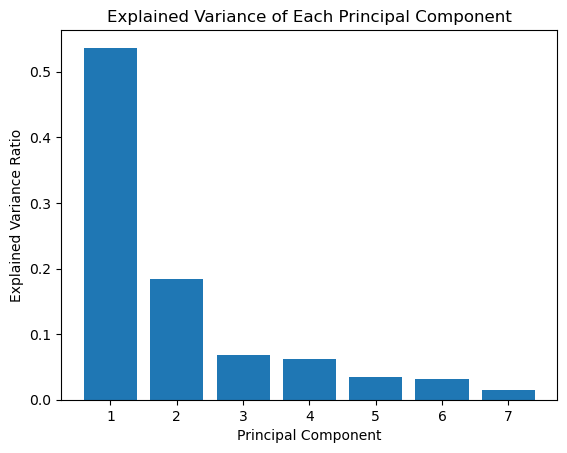

In [30]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Principal Component')
plt.show()


Box Plot of PCs By Diagnosis

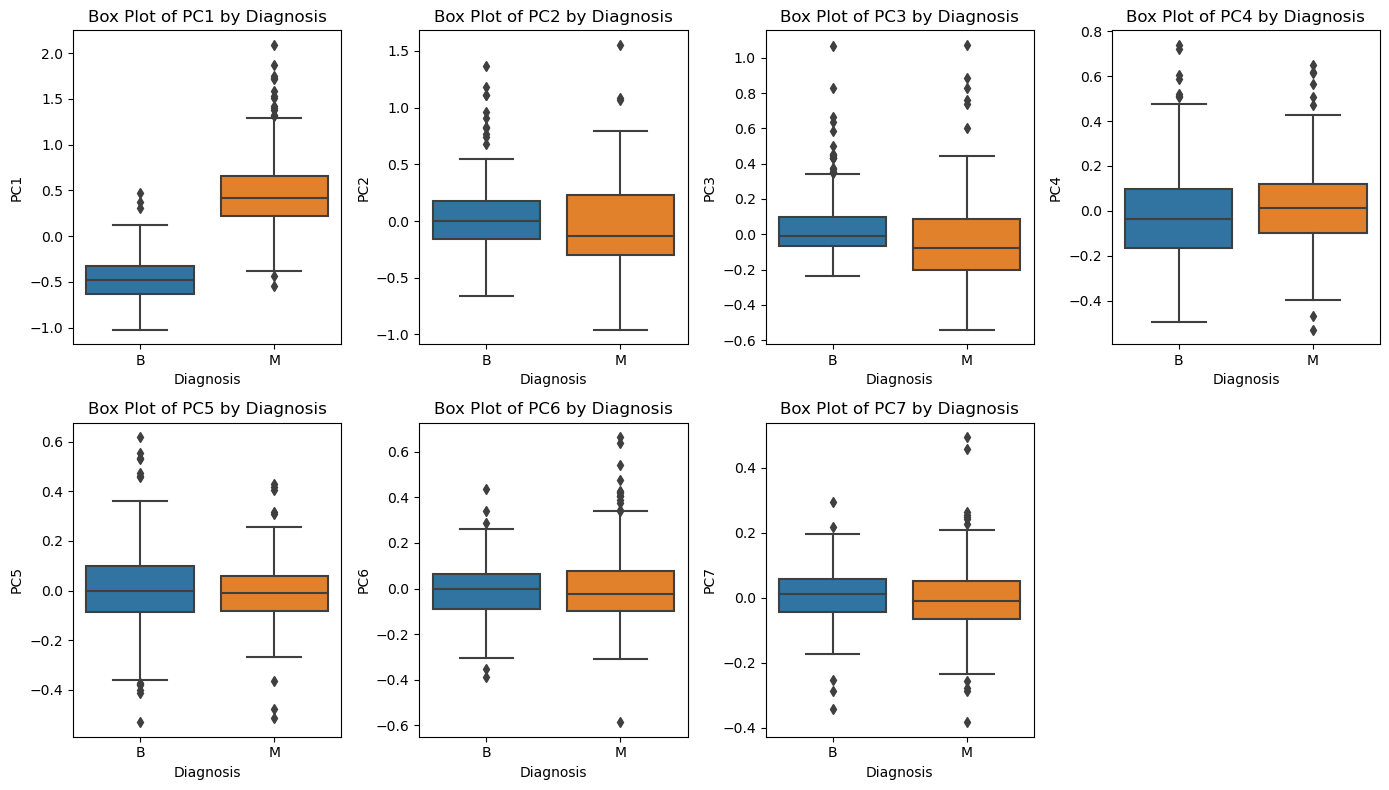

In [31]:
plt.figure(figsize=(14, 8))
for i in range(7):  # Update the range to 7
    plt.subplot(2, 4, i + 1)  # Adjust the subplot layout for 7 PCs
    sns.boxplot(x='Diagnosis', y=f'PC{i + 1}', data=df_pca_train)
    plt.title(f'Box Plot of PC{i + 1} by Diagnosis')

plt.tight_layout()
plt.show()



Correlation Heatmap of the 7 Principal Components

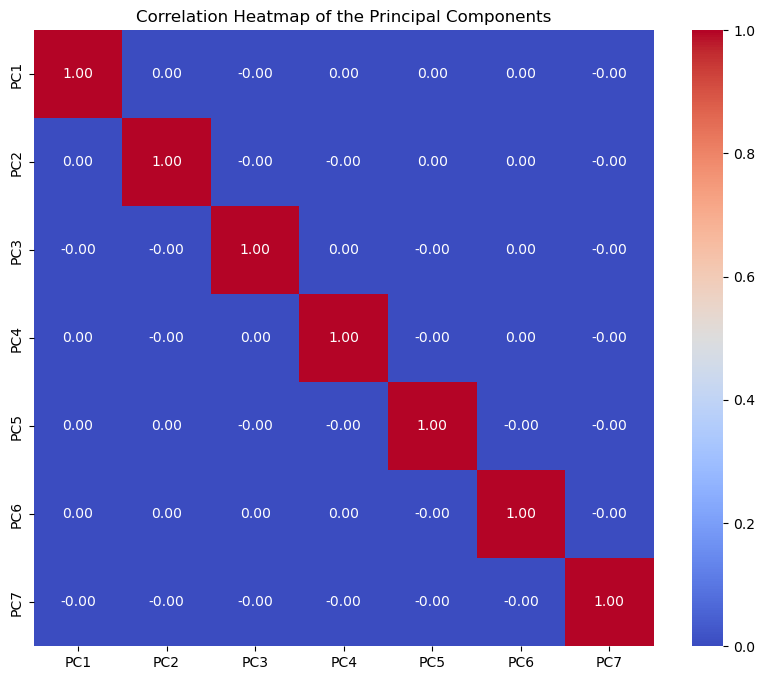

In [32]:
pc_correlation = df_pca_train.iloc[:, :7].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(pc_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the Principal Components')
plt.show()


1s along the diagonal indicate perfect correlation between each PC and itself. Hence no multicolinearity amongst PCs

DISTRIBUTION OF 7 PRINCIPAL COMPONENTS

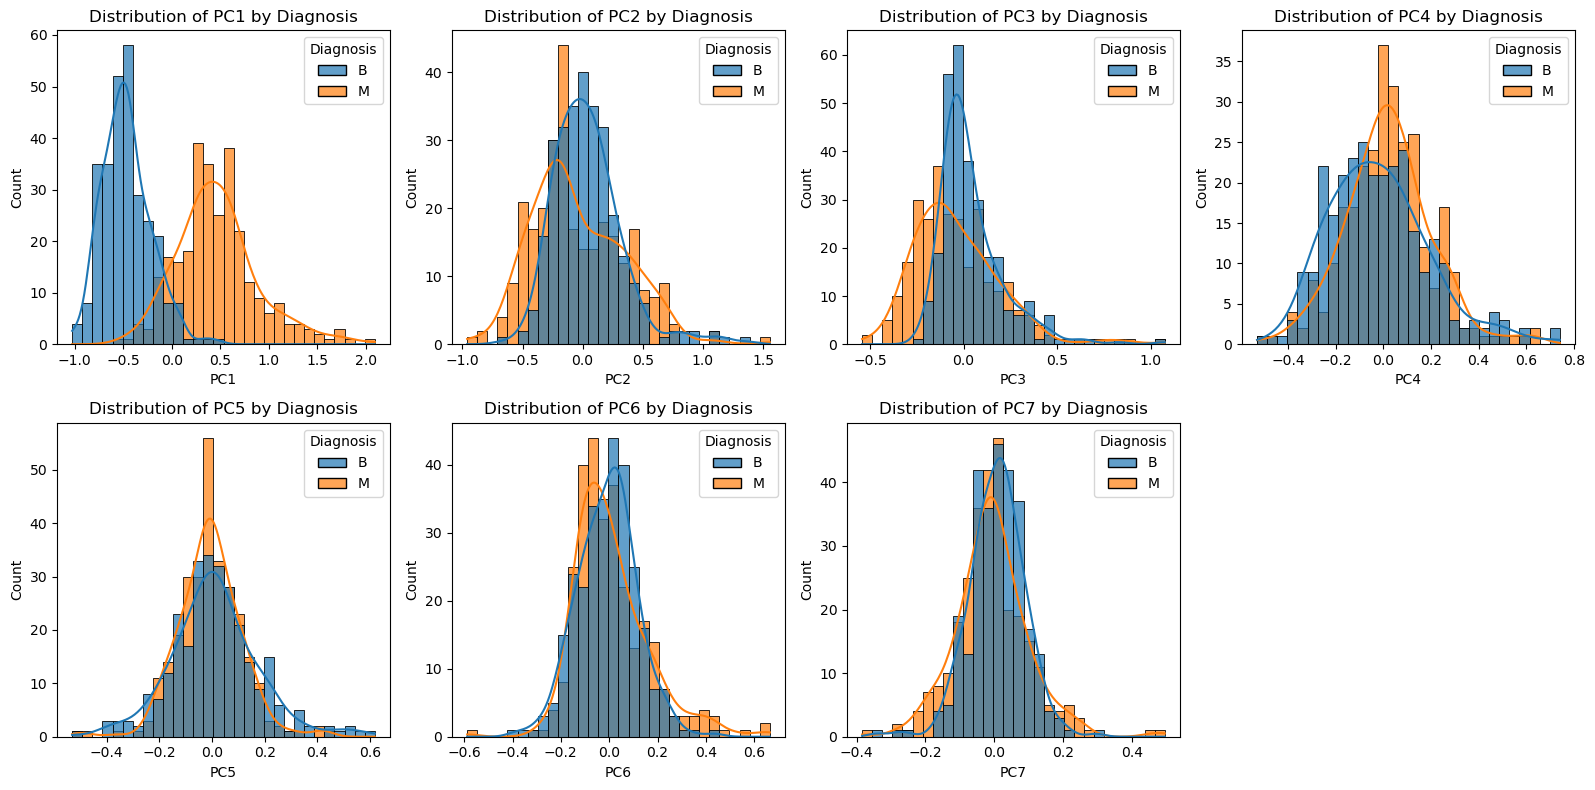

In [33]:
plt.figure(figsize=(16, 8))
for i in range(7):  # Update the range to 7
    plt.subplot(2, 4, i + 1)  # Adjust the subplot layout for 7 PCs
    sns.histplot(data=df_pca_train, x=f'PC{i + 1}', hue='Diagnosis', kde=True, bins=30, alpha=0.7)
    plt.title(f'Distribution of PC{i + 1} by Diagnosis')

plt.tight_layout()
plt.show()


Feature Loading Analysis

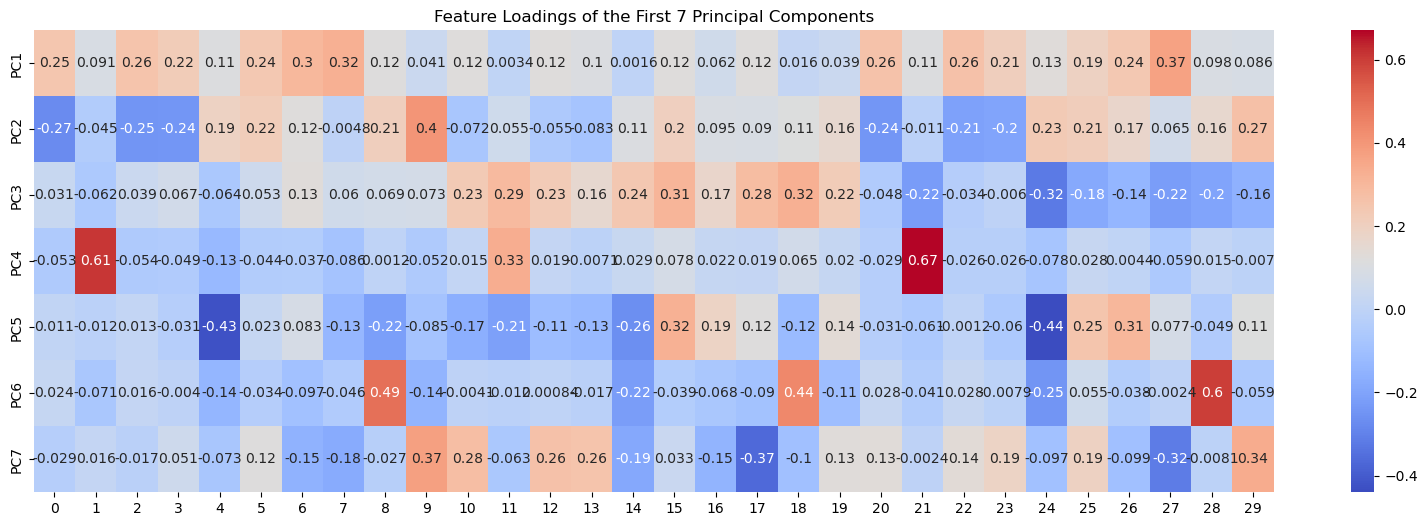

In [34]:
# Assuming 'features' is a list of original feature names
feature_loadings = pca.components_[:7, :]

plt.figure(figsize=(20, 6))
sns.heatmap(feature_loadings, annot=True, cmap='coolwarm', yticklabels=[f'PC{i + 1}' for i in range(7)])
plt.title('Feature Loadings of the First 7 Principal Components')
plt.show()


we can conclude that feature 1 and feature 21 contributes the most to PC4. Likewise, feature 4 and feature 24 contributing the most to PC5.  

In [35]:
df_pca_train = df_pca_train.drop('Diagnosis', axis=1)

**MODELLING**

**LOGISTIC RERESSION CLASSIFIER WITH 7 PC SCORES**


In [36]:

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(df_pca_train, y_train_resampled)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

LOGISTIC REGREESSION EVALUATION

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(df_pca_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158
Confusion Matrix:
 [[69  2]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



LOGISTIC REGRESSION ROC CURVE

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


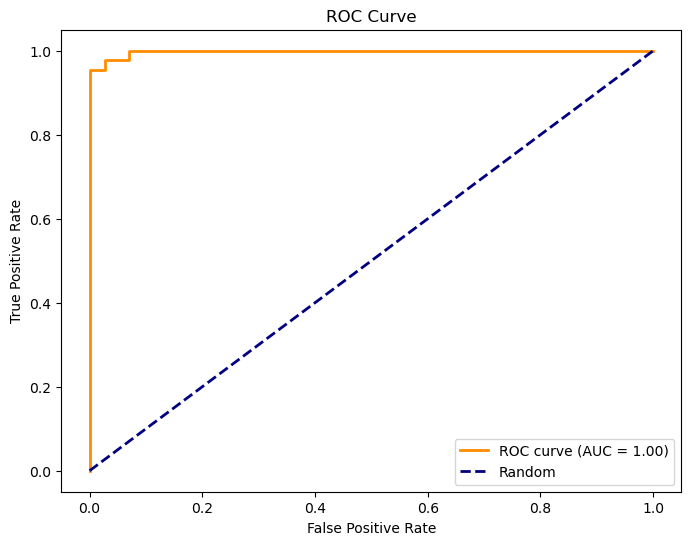

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Assuming you already have X_test_scaled, y_test, and model from the previous code

# Assuming y_test contains 'B' and 'M' classes
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(df_pca_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


AUC of 1 indicates a perfect classifier

**SUPPORT VECTOR MACHINE CLASSIFFIER ON 7 PRINCIPAL COMPONENTS**

In [39]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=50)  # You can choose a different kernel based on your requirements

# Train the SVM model
svm_classifier.fit(df_pca_train, y_train_resampled)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(df_pca_test)

# Evaluate the performance of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print the results
print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{classification_rep_svm}')

Accuracy: 0.9736842105263158
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SUPPORT VECTOR MACHINE ROC CURVE

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


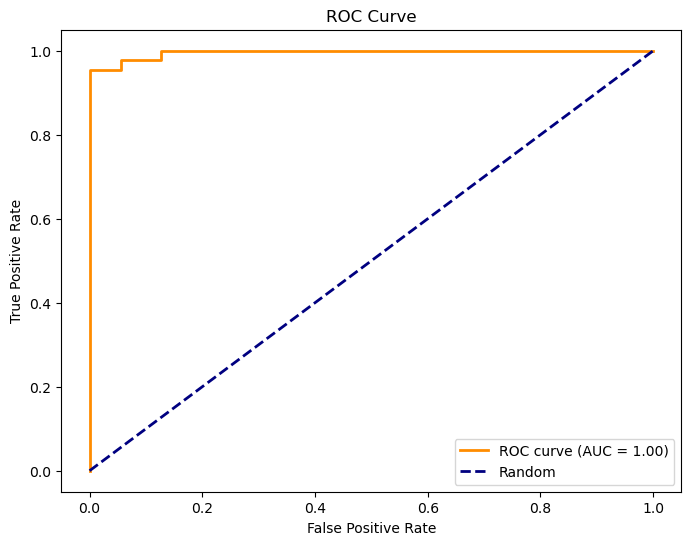

In [40]:
# Assuming y_test contains 'B' and 'M' classes
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Get predicted probabilities for the positive class
y_prob = svm_classifier.decision_function(df_pca_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


AUC of 1 indicates a perfect classifier

**NOW LET US MODEL USING 15 PRINCIPAL COMPONENTS**



In [41]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(df_normalized, y, test_size=0.2, random_state=45)

# Separate features and target variable for training set
X_train = X_train.drop('Diagnosis', axis=1)  # Drop the target column for X_train
X_test = X_test.drop('Diagnosis', axis=1)
y_train = y_train

# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape before SMOTE:", X_train.shape, y_train.shape)
print("Shape after SMOTE:", X_train_resampled.shape, y_train_resampled.shape)

Shape before SMOTE: (455, 30) (455, 1)
Shape after SMOTE: (570, 30) (570, 1)


SELECT 15 PRINCIPAL COMPONENTS

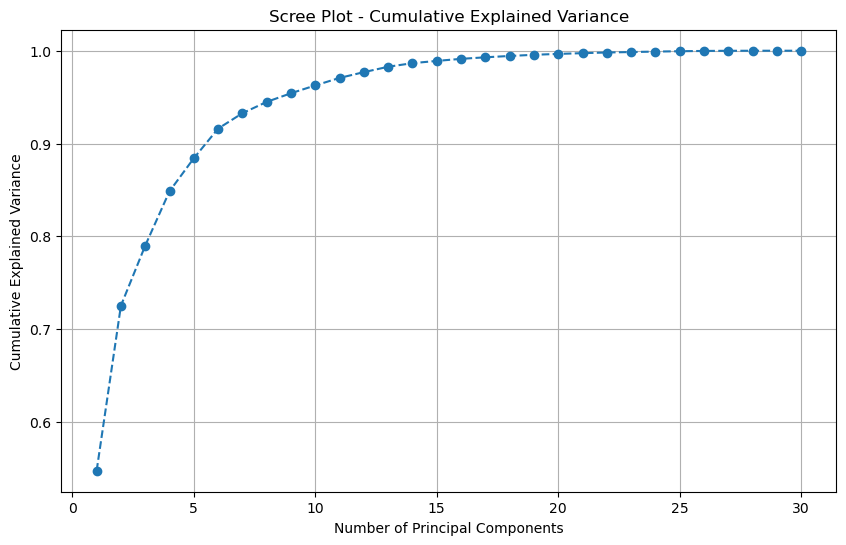

In [42]:

# Initialize PCA
pca = PCA()

# Fit PCA on the resampled training data
pca.fit(X_train_resampled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


LET US CHOOSE 15 PRINCIPAL COMPONENTS

In [43]:
# Perform PCA on the training data
n_components = 15  # specify the number of components
pca = PCA(n_components=n_components)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_resampled)

# Transform the test data using the same PCA object
X_test_pca = pca.transform(X_test)

# Check the shape of the transformed data
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)

Shape of X_train_pca: (570, 15)
Shape of X_test_pca: (114, 15)


DataFrame with the reduced-dimensional TRAIN data

In [44]:
# Create a DataFrame with the reduced-dimensional data
df_pca15_train = pd.DataFrame(data=X_train_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_pca15_train['Diagnosis'] = y_train_resampled
df_pca15_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Diagnosis
0,-0.709544,-0.177282,0.112683,-0.057144,-0.010993,0.036500,0.034495,0.006226,0.008535,0.030623,0.030427,-0.132100,-0.044694,-0.026401,-0.017379,B
1,-0.745737,-0.001980,-0.305608,0.299935,0.034824,0.188270,0.045089,-0.015959,-0.020802,-0.027261,0.037698,0.013543,-0.003003,-0.006134,0.026208,B
2,-0.636170,-0.063882,0.261319,-0.201812,-0.073821,0.324417,-0.020918,0.013649,-0.005634,-0.020041,-0.007096,-0.027998,-0.025081,0.041553,0.017973,B
3,0.739657,-0.524012,-0.095612,-0.067082,-0.003262,-0.143277,-0.036534,-0.134109,0.086626,0.122432,-0.003588,-0.004962,0.030421,0.027775,-0.032727,M
4,0.436008,0.615429,-0.204801,-0.160558,-0.161052,0.060048,-0.060843,0.109897,0.036681,-0.047487,-0.030656,-0.062886,-0.065621,-0.015951,0.053683,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.687633,-0.132844,-0.042333,-0.290183,-0.056160,-0.109113,-0.015690,-0.044690,-0.000101,-0.071635,0.088341,-0.032683,0.039215,-0.012278,-0.020061,M
566,1.491894,0.005741,0.352861,0.230148,-0.121256,-0.065810,-0.168248,0.145937,-0.106393,-0.113272,0.178408,0.065990,-0.017160,0.014749,0.042721,M
567,0.077255,0.126367,-0.148518,-0.215253,0.015019,-0.122322,-0.070002,0.065441,0.031715,0.044649,-0.015940,-0.001723,0.035494,0.010934,0.029549,M
568,0.213813,0.280989,0.182752,-0.137742,-0.208128,-0.204356,-0.090390,-0.046872,0.013372,0.089057,-0.041799,-0.022706,-0.011611,-0.011402,-0.004958,M


DataFrame with the reduced-dimensional TEST data

In [45]:
# Create a DataFrame with the reduced-dimensional data
df_pca15_test = pd.DataFrame(data=X_test_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_pca15_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.176083,0.324629,0.033137,-0.049987,0.308813,-0.139849,-0.080298,-0.067115,0.089229,0.148655,-0.047637,0.035850,-0.063991,0.051662,0.020940
1,0.290806,-0.189659,0.295870,0.141366,0.006386,0.208618,-0.004753,-0.076116,0.037804,-0.027145,-0.176373,0.079589,-0.089502,-0.057964,0.075151
2,0.547968,-0.434553,-0.050152,-0.348856,-0.113823,-0.037227,-0.044102,0.033201,-0.086853,-0.107579,0.045397,-0.011323,0.081411,-0.044618,0.039908
3,-0.375958,0.455291,0.015995,0.346266,-0.058362,-0.064479,0.257654,-0.065481,-0.162348,-0.105652,-0.080855,-0.066900,0.047389,-0.094684,-0.023188
4,-0.100842,1.103459,-0.074516,0.388343,-0.287963,-0.328943,0.271745,0.129725,-0.028024,-0.101935,-0.193127,-0.086068,0.045215,-0.229939,-0.082402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.447033,0.133461,0.049893,-0.075813,-0.154374,0.020418,-0.036208,-0.088460,-0.027095,-0.093851,-0.047551,0.024652,-0.080779,-0.019713,0.017015
110,-0.598881,-0.186851,0.051423,-0.101590,0.119643,0.087667,-0.037591,0.000577,-0.036514,0.084214,0.128779,0.083997,0.045860,0.027713,0.028505
111,-0.801660,-0.164155,0.107428,0.304486,0.032218,0.071541,0.060353,-0.021488,-0.083025,0.059146,0.050909,0.056863,0.048095,0.131077,-0.047679
112,0.160414,0.093311,0.241642,0.157918,-0.140870,-0.027720,-0.042675,0.048808,-0.161100,-0.010501,0.172899,-0.123824,0.023769,-0.091593,-0.009595


EXPLAINED VARIANCE RATIO PLOT

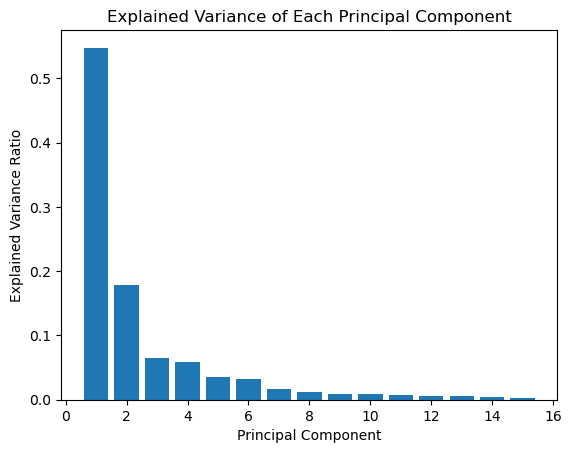

In [46]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Principal Component')
plt.show()

 Box plot of 15 principal components

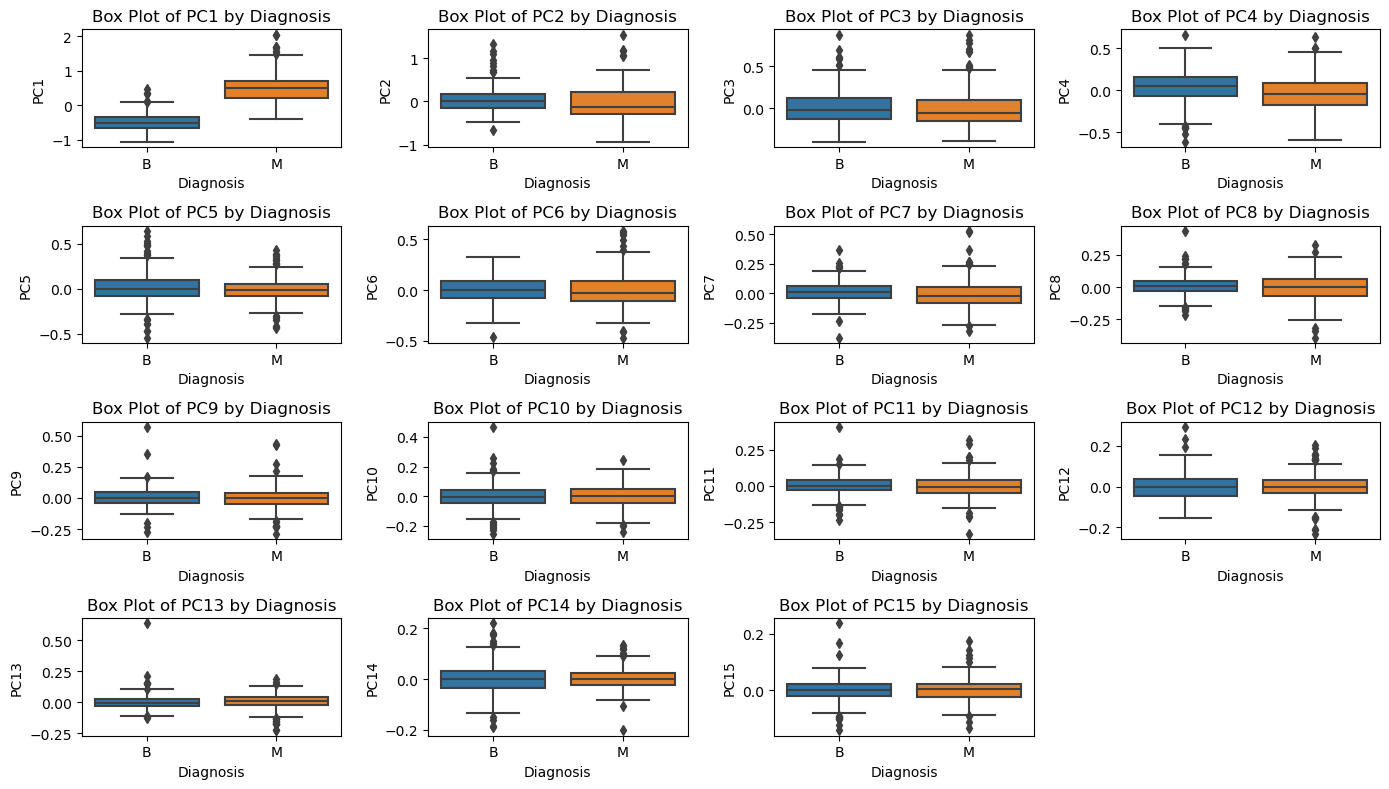

In [47]:
plt.figure(figsize=(14, 8))
for i in range(15):  # Update the range to 15
    plt.subplot(4, 4, i + 1)  # Adjust the subplot layout for 7 PCs
    sns.boxplot(x='Diagnosis', y=f'PC{i + 1}', data=df_pca15_train)
    plt.title(f'Box Plot of PC{i + 1} by Diagnosis')

plt.tight_layout()
plt.show()


Feature loadings of 15 principal components

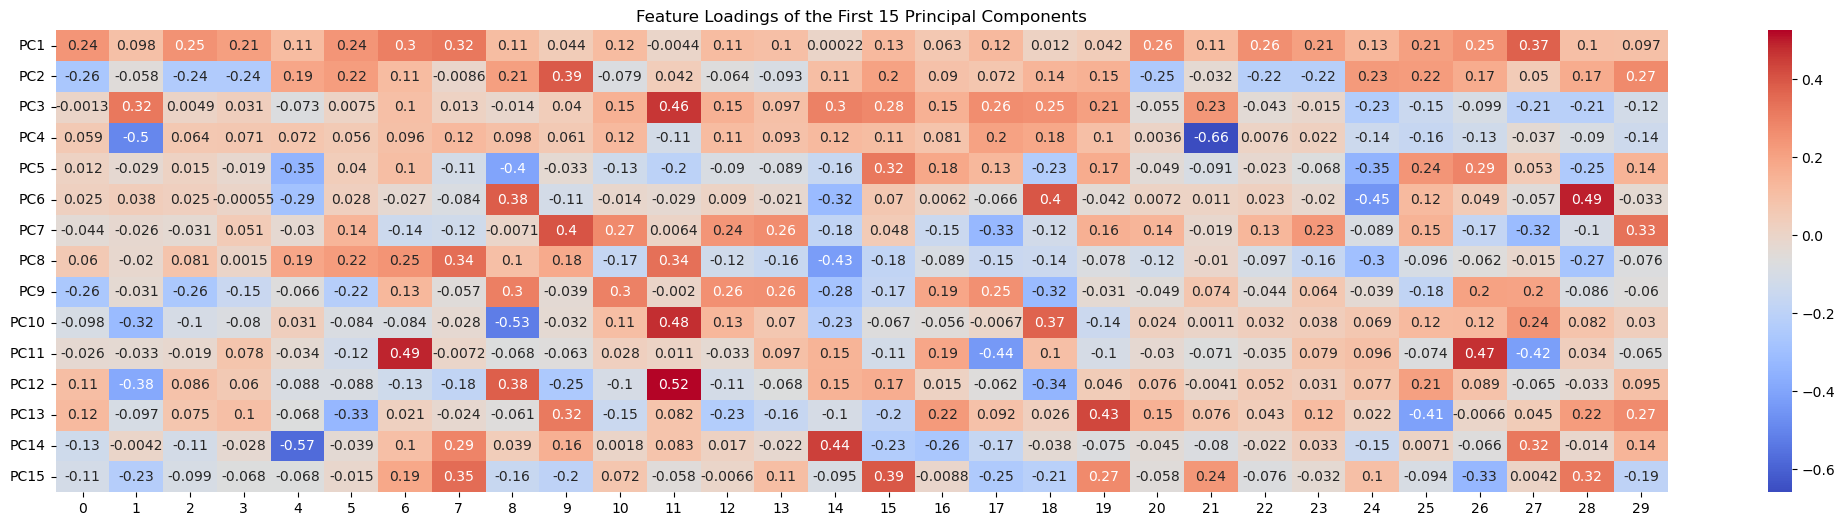

In [48]:
feature_loadings = pca.components_[:15, :]

plt.figure(figsize=(26, 6))
sns.heatmap(feature_loadings, annot=True, cmap='coolwarm', yticklabels=[f'PC{i + 1}' for i in range(15)])
plt.title('Feature Loadings of the First 15 Principal Components')
plt.show()

In [49]:
df_pca15_train = df_pca15_train.drop('Diagnosis', axis=1)

**LOGISTIC REGRESSION CLASSIFIER WITH 15 PRINCIPAL COMPONENTS**



In [50]:
# Initialize the model
model2 = LogisticRegression()

# Train the model
model2.fit(df_pca15_train, y_train_resampled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Prediction and Evaluation

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = model2.predict(df_pca15_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[72  0]
 [ 2 40]]
Classification Report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



PLOT ROC CURVE

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


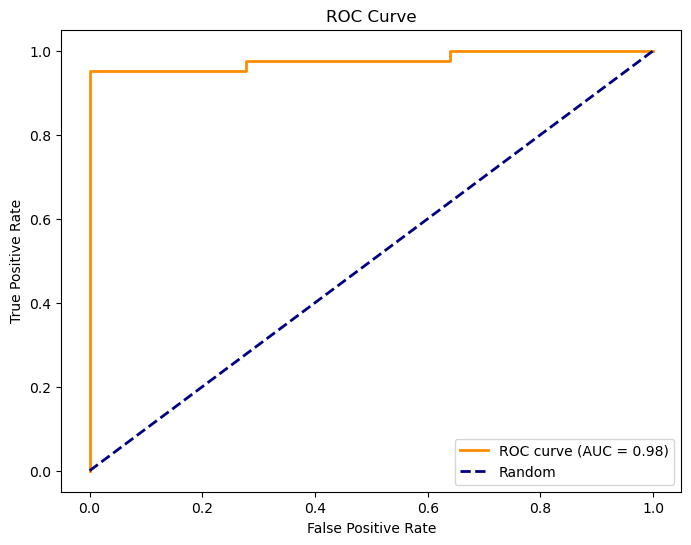

In [52]:
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Get predicted probabilities for the positive class
y_prob = model2.predict_proba(df_pca15_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**SUPPORT VECTOR MACHINE CLASSIFIER WITH 15 PRINCIPAL COMPONENTS**


In [53]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=60)

# Train the SVM model
svm_classifier.fit(df_pca15_train, y_train_resampled)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(df_pca15_test)

# Evaluate the performance of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print the results
print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{classification_rep_svm}')

Accuracy: 0.9824561403508771
Confusion Matrix:
[[72  0]
 [ 2 40]]
Classification Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC CURVE

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


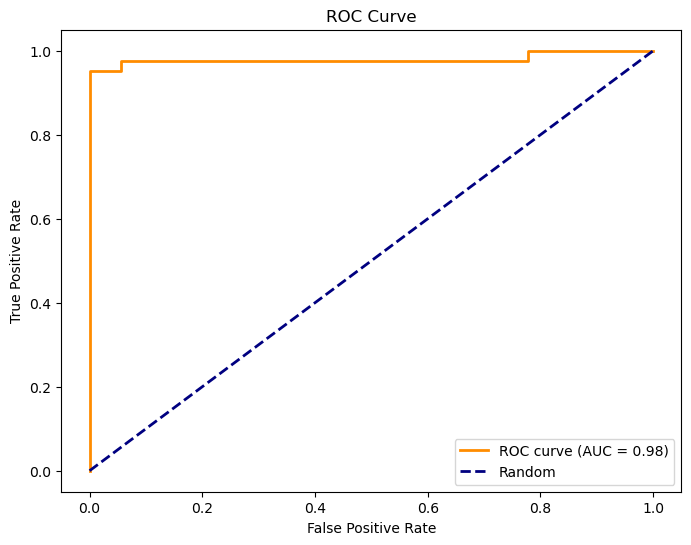

In [54]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_test contains 'B' and 'M' classes
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Get predicted probabilities for the positive class
y_prob = svm_classifier.decision_function(df_pca15_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [55]:
# Results for Logistic Regression with 7 Principal Components
lr_7pc_results = {
    "Model": "Logistic Regression (7 PCs)",
    "Accuracy": 0.9736842105263158,
    "Confusion Matrix": [[69, 2], [1, 42]],
    "Classification Report": """
               precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
    """
}

# Results for SVM with 7 Principal Components
svm_7pc_results = {
    "Model": "SVM (7 PCs)",
    "Accuracy": 0.9736842105263158,
    "Confusion Matrix": [[70, 1], [2, 41]],
    "Classification Report": """
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
    """
}

# Results for Logistic Regression with 15 Principal Components
lr_15pc_results = {
    "Model": "Logistic Regression (15 PCs)",
    "Accuracy": 0.9824561403508771,
    "Confusion Matrix": [[72, 0], [2, 40]],
    "Classification Report": """
               precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114
    """
}

# Results for SVM with 15 Principal Components
svm_15pc_results = {
    "Model": "SVM (15 PCs)",
    "Accuracy": 0.9824561403508771,
    "Confusion Matrix": [[72, 0], [2, 40]],
    "Classification Report": """
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114
    """
}

# Print the results
for result in [lr_7pc_results, svm_7pc_results, lr_15pc_results, svm_15pc_results]:
    print(f"\n{result['Model']} Results:")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Confusion Matrix: {result['Confusion Matrix']}")
    print(f"Classification Report: {result['Classification Report']}")



Logistic Regression (7 PCs) Results:
Accuracy: 0.9736842105263158
Confusion Matrix: [[69, 2], [1, 42]]
Classification Report: 
               precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
    

SVM (7 PCs) Results:
Accuracy: 0.9736842105263158
Confusion Matrix: [[70, 1], [2, 41]]
Classification Report: 
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
    

Logistic Regression (15 PCs) Results:
Accuracy: 0.9824561403508771
Confusion Matrix: [[72, 0], [